<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 08 Decision Trees
## CSC 401 Lab
## Alex Lagarde
### 3/8/21

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ATf3eoCvAKG_I2luCV2gj_GRDUXoybFR')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'SibSp', 'Parch']]
X = pd.get_dummies(X)
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


In [ ]:
# Splitting data to 90% train and 10% test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1, random_state = 0)

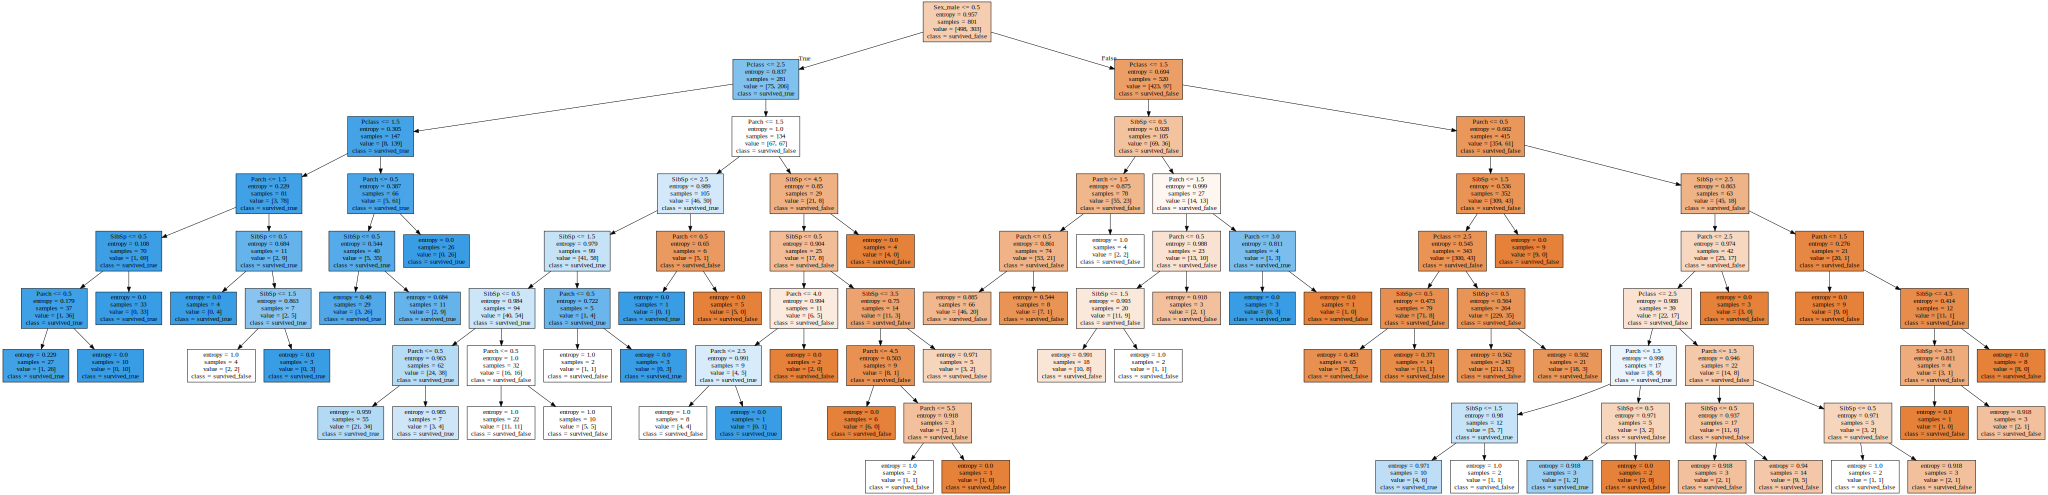

In [ ]:
# building decision tree classifier 
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(Xtrain, ytrain)
vis_data = export_graphviz(clf, out_file=None,
                           feature_names = Xtrain.columns,
                           class_names = ['survived_false', 'survived_true'],
                           filled = True)
graph = graphviz.Source(vis_data)
graph

### Decision Tree Observations
Since the root node is sex_male <= 0.5, the decision tree algorithm using entropy has determined that the sex_male attribute, which determines if the sex is male or not, is the most important determining whether a passenger survived. 

The leaf node with an entropy of 0 and the largest number of samples with survived passengers share a few attributes: they are female, they have no parent on the ship, they have no children, and they are in passenger class 2. 


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       498
           1       0.85      0.63      0.72       303

    accuracy                           0.82       801
   macro avg       0.83      0.78      0.79       801
weighted avg       0.82      0.82      0.81       801



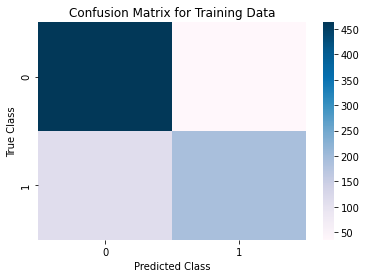

In [ ]:
# Using training data to predict 
ypreds = clf.predict(Xtrain)
cm = confusion_matrix(ytrain, ypreds)
print(classification_report(ytrain, ypreds))
sns.heatmap(cm, cmap='PuBu', cbar=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



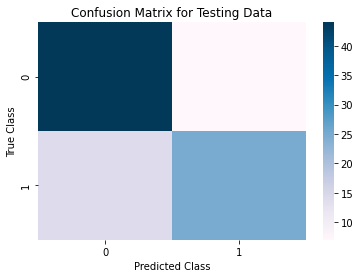

In [ ]:
# Using testing data to predict
ypreds2 = clf.predict(Xtest)
cm2 = confusion_matrix(ytest, ypreds2)
print(classification_report(ytest, ypreds2))
sns.heatmap(cm2, cmap='PuBu', cbar=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Decision Tree Model Results Observations
In terms of accuracy, when the training data is used for prediction, the model predicts the correct classification 82% of the time. 

On the contrary, when using the testing data, the accuracy score of the model yields the correct classification 77% of the time. 

The training data predicts the correct classification 5% more often then the testing data. Although it makes sense since the training data is the data used to fit the model, the discrepancy indicates there is a slight bit of overfitting because the model does not generalize as well to testing data. The model could be fitting too many details rather than the overall properties. 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



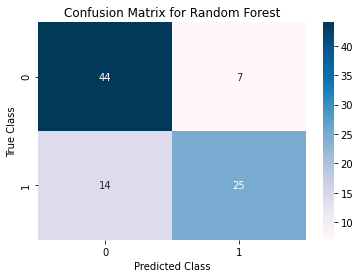

In [ ]:
# Creating Random Forest Model
model = RandomForestClassifier(n_estimators=10, random_state=0, criterion='entropy')
model.fit(Xtrain, ytrain)
ypreds3 = model.predict(Xtest)
print(classification_report(ytest, ypreds3))
cm3 = confusion_matrix(ytest, ypreds2)
sns.heatmap(cm3, cmap='PuBu', cbar=True, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Random Forest Observations
The random forest model, using the testing data, has an accuracy score of 0.81 compared to 0.77 for the decision tree. Therefore, the random forest model accurately predicts the classification 81% of the time. The ensemble of decision trees, using the same amount of estimators, appears to outperform just a single decision tree. 